<a href="https://colab.research.google.com/github/paulo-antunes-1/paulo-antunes-atmospheric-data/blob/main/ERA5_Climatology/ERA5_Climatology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cdsapi
!pip install xarray netCDF4 matplotlib cartopy --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 40.4 MB/s eta 0:00:00


In [ ]:
import os
import cdsapi
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [ ]:
!ls /content

drive  sample_data


In [ ]:
#Cadastro e uso das informações do site
cdsapirc_path = os.path.expanduser("~/.cdsapirc")
with open(cdsapirc_path, 'w') as f:
    f.write("""url: https://cds.climate.copernicus.eu/api
key: 4c7c7558-2dc2-4099-9287-95d83bde8669
""")

In [ ]:
#Teste de um dia
drive_path = '/content/drive/MyDrive/ERA5_data'
os.makedirs(drive_path, exist_ok=True)

output_file = os.path.join(drive_path, 'era5_t2m_test.nc')

c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['2m_temperature'],
        'year': '2022',
        'month': ['01'],
        'day': ['01'],
        'time': ['00:00'],
        'area': [-35, -75, 5, -35],
        'format': 'netcdf',
    },
    output_file
)


2025-06-25 16:42:27,465 WARNING [2025-06-23T00:00:00] Scheduled System Session affecting Service reliability - 30 June 2025. Please follow status [here](https://status.ecmwf.int/) or in our [forum](https://forum.ecmwf.int/t/scheduled-maintenance-of-the-cloud-infrastructure-on-30-june-2025/13598)
2025-06-25 16:42:27,468 INFO [2025-06-16T00:00:00] CC-BY licence to replace Licence to use Copernicus Products on 02 July 2025. More information available [here](https://forum.ecmwf.int/t/cc-by-licence-to-replace-licence-to-use-copernicus-products-on-02-july-2025/13464)
INFO:ecmwf.datastores.legacy_client:[2025-06-16T00:00:00] CC-BY licence to replace Licence to use Copernicus Products on 02 July 2025. More information available [here](https://forum.ecmwf.int/t/cc-by-licence-to-replace-licence-to-use-copernicus-products-on-02-july-2025/13464)
2025-06-25 16:42:27,470 INFO [2025-06-10T00:00:00] To improve our C3S service, we need to hear from you! Please complete this very short [survey](https://

38ec865fa340f8ee89b58971f791b899.nc:   0%|          | 0.00/68.5k [00:00<?, ?B/s]

'/content/drive/MyDrive/ERA5_data/era5_t2m_test.nc'

In [ ]:
#Downloading the data of a year
drive_path = '/content/drive/MyDrive/ERA5_data'
os.makedirs(drive_path, exist_ok=True)

output_file = os.path.join(drive_path, 'era5_t2m_2022_brasil.nc')

c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': ['2m_temperature'],
        'year': '2022',
        'month': [f"{m:02d}" for m in range(1, 13)],
        'day': [f"{d:02d}" for d in range(1, 32)],
        'time': ['00:00'],
        'area': [-35, -75, 5, -35],
        'format': 'netcdf',
    },
    output_file
)



2025-06-25 16:45:13,584 INFO Request ID is 44499f2b-12f6-4134-a276-8eb5aa060788
INFO:ecmwf.datastores.legacy_client:Request ID is 44499f2b-12f6-4134-a276-8eb5aa060788
2025-06-25 16:45:13,744 INFO status has been updated to accepted
INFO:ecmwf.datastores.legacy_client:status has been updated to accepted
2025-06-25 16:45:19,476 INFO status has been updated to running
INFO:ecmwf.datastores.legacy_client:status has been updated to running
2025-06-25 16:46:04,829 INFO status has been updated to successful
INFO:ecmwf.datastores.legacy_client:status has been updated to successful


806b1e894dd43c73919b3df55f51d782.nc:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

'/content/drive/MyDrive/ERA5_data/era5_t2m_2022_brasil.nc'

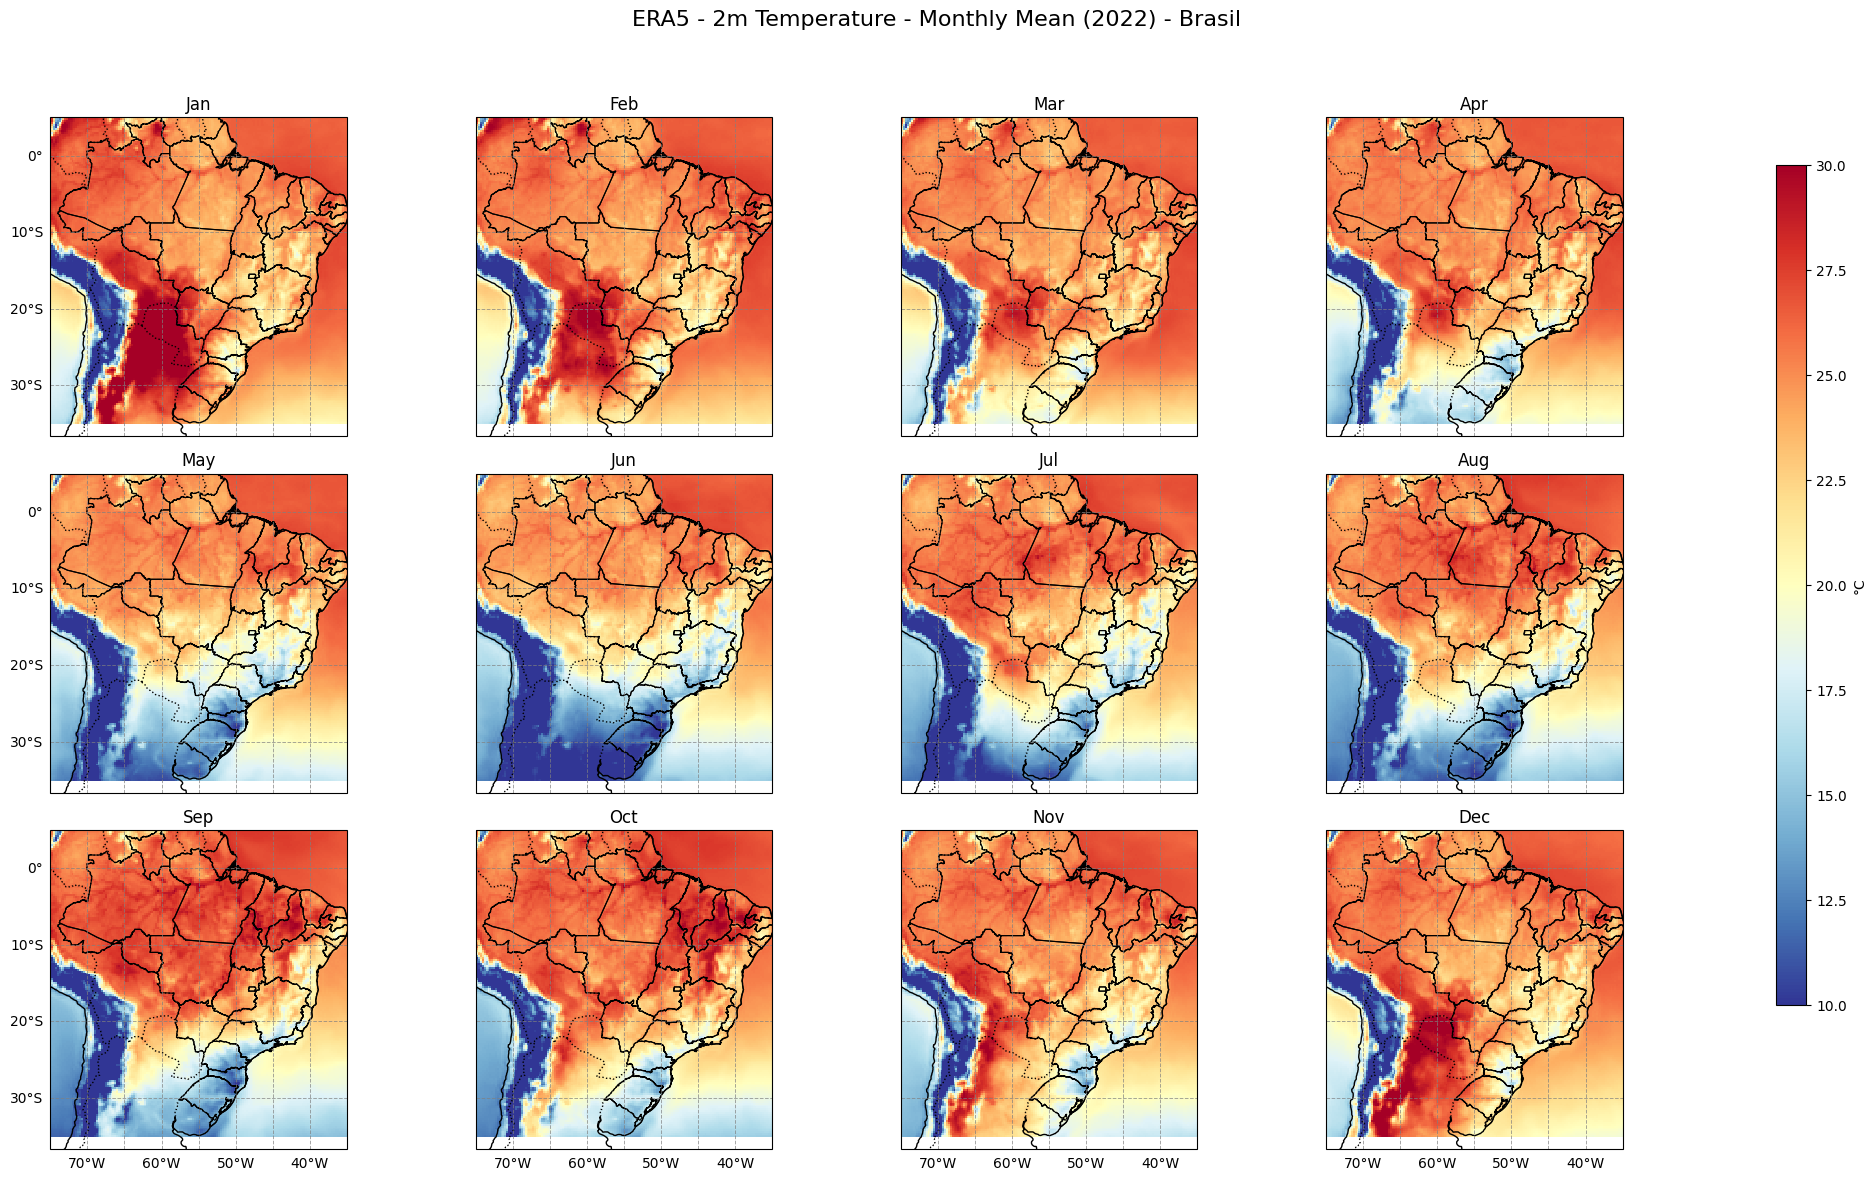

In [ ]:
# Abrir o NetCDF
ds = xr.open_dataset('/content/drive/MyDrive/ERA5_data/era5_t2m_2022_brasil.nc')

# Kelvin para Celsius
ds['t2m'] = ds['t2m'] - 273.15

# Média mensal
monthly_mean = ds['t2m'].groupby('valid_time.month').mean(dim='valid_time')

# Extent do Brasil
extent = [-75, -35, -35, 5]

# Limites para cor
vmin, vmax = 10, 30

# Meses para título
months_name = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Baixar GeoJSON dos estados do Brasil (pode rodar direto no Colab)
url_geojson = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
states_gdf = gpd.read_file(url_geojson)

# Criar figura e eixos com projeção
fig, axes = plt.subplots(3, 4, figsize=(20, 12),
                         subplot_kw={'projection': ccrs.PlateCarree()})

fig.suptitle('ERA5 - 2m Temperature - Monthly Mean (2022) - Brasil', fontsize=16)

for i, ax in enumerate(axes.flat):
    month = i + 1
    data = monthly_mean.sel(month=month)

    im = data.plot(ax=ax, transform=ccrs.PlateCarree(),
                   cmap='RdYlBu_r', add_colorbar=False,
                   vmin=vmin, vmax=vmax)

    # Plotar contorno dos estados do Brasil
    states_gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8, transform=ccrs.PlateCarree())

    # Adicionar costa e fronteiras do Brasil
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    ax.set_extent(extent)

    ax.set_title(months_name[i])

    # Grades e labels só nas bordas
    gl = ax.gridlines(draw_labels=True, linewidth=0.7, color='gray', alpha=0.7, linestyle='--')

    gl.top_labels = False
    gl.right_labels = False

    if i % 4 == 0:
        gl.left_labels = True
    else:
        gl.left_labels = False

    if i // 4 == 2:
        gl.bottom_labels = True
    else:
        gl.bottom_labels = False

# Barra de cor única
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax, label='°C')

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()


In [ ]:
!pip install nbconvert --quiet

In [ ]:
import nbformat

notebook_path = '/content/drive/MyDrive/ColabNotebooks/ERA5_Climatology.ipynb'  # <-- substitua pelo seu arquivo

# Carrega o notebook
with open(notebook_path, 'r', encoding='utf-8') as f:
    nb = nbformat.read(f, as_version=4)

# Remove a chave 'widgets' de cada célula, se existir
for cell in nb['cells']:
    if 'metadata' in cell and 'widgets' in cell['metadata']:
        del cell['metadata']['widgets']

# Remove de todo o notebook também (nível global)
if 'widgets' in nb['metadata']:
    del nb['metadata']['widgets']

# Salva o notebook limpo
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbformat.write(nb, f)

print("Notebook limpo com sucesso!")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ColabNotebooks/ERA5_Climatology.ipynb'